<a href="https://colab.research.google.com/github/dongnt-1904/UEH-KTLT-ECO25/blob/D%E1%BB%B1-%C3%A1n-cu%E1%BB%91i-k%E1%BB%B3/Ti%E1%BB%81n_x%E1%BB%AD_l%C3%BD_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dự án cuối kỳ - Loan Data

## 1. Mô tả bộ dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ file CSV
from google.colab import files
uploaded = files.upload()
print("Đã đọc file thành công! Kích thước dữ liệu:")

Saving loan_data.csv to loan_data (1).csv
Đã đọc file thành công! Kích thước dữ liệu:


In [ ]:
#Xem nhanh bộ dữ liệu
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#Xem thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Nhận xét:
Bộ dữ liệu cho vay này có 9.578 quan sát và 14 biến, với một ưu điểm lớn là không có bất kỳ giá trị thiếu (missing values) nào trên tất cả các cột. Về kiểu dữ liệu, phần lớn là các biến số định lượng (float64 và int64), bao gồm các chỉ số tài chính và rủi ro quan trọng như int.rate (lãi suất), fico (điểm tín dụng), và log.annual.inc (thu nhập). Tuy nhiên, có một cột danh mục là purpose (kiểu object), cột này sẽ cần được mã hóa (như One-Hot Encoding) thành định dạng số trước khi đưa vào các mô hình học máy. Cuối cùng, biến mục tiêu not.fully.paid thuộc kiểu int64 (chứa giá trị 0/1), xác nhận việc có thể dùng thuật toán phân lớp để dự đoán rủi ro vỡ nợ và xem xét đặc tính nào ảnh hưởng lớn nhất đến rủi ro đố.

## 2. Tiền xử lý dữ liệu

### 2.1. Làm sạch dữ liệu

#### 2.1.1 Xử lý Missing value




Xử lý giá trị bị thiếu (Missing Value Handling) là quá trình phát hiện và khắc phục các ô dữ liệu trống, null hoặc NaN trong bộ dữ liệu. Đây là bước rất quan trọng vì giá trị bị thiếu có thể làm sai lệch kết quả phân tích, giảm độ chính xác của mô hình học máy hoặc khiến một số thuật toán không thể hoạt động. Việc xử lý có thể được thực hiện bằng nhiều cách khác nhau như: loại bỏ các hàng hoặc cột chứa nhiều giá trị thiếu, thay thế (impute) giá trị bị thiếu bằng trung bình, trung vị, mode hoặc giá trị dự đoán, hoặc giữ nguyên nếu giá trị thiếu mang ý nghĩa đặc biệt.

In [ ]:
# 1. Tính tổng số lượng giá trị thiếu cho mỗi cột
missing_count = df.isnull().sum()

# 2. Tính tỷ lệ phần trăm giá trị thiếu
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# 3. Tạo một DataFrame tổng hợp
missing_data = pd.DataFrame({
    'Số lượng thiếu': missing_count,
    'Tỷ lệ thiếu (%)': missing_percentage.round(2)
})
missing_data

,Số lượng thiếu,Tỷ lệ thiếu (%)
credit.policy,0,0.0
purpose,0,0.0
int.rate,0,0.0
installment,0,0.0
log.annual.inc,0,0.0
dti,0,0.0
fico,0,0.0
days.with.cr.line,0,0.0
revol.bal,0,0.0
revol.util,0,0.0


##### Nhận xét: Kết quả kiểm tra cho thấy bộ dữ liệu Loan_data là bộ dữ liệu tốt và không bị thiếu các giá trị

#### 2.1.2. Xử lý giá trị trùng lặp

Xử lý giá trị trùng lặp (Duplicate Value Handling) là quá trình phát hiện và loại bỏ các bản ghi giống hệt nhau hoặc gần giống nhau trong bộ dữ liệu. Đây là bước quan trọng trong tiền xử lý dữ liệu vì các giá trị trùng lặp có thể làm sai lệch kết quả thống kê, ảnh hưởng đến hiệu suất và độ chính xác của các mô hình phân tích hoặc học máy. Việc xử lý có thể thực hiện bằng cách xác định và loại bỏ các hàng trùng hoàn toàn, hoặc kiểm tra các trường hợp trùng lặp theo một hoặc một vài cột quan trọng. Mục tiêu của quá trình này là đảm bảo dữ liệu chỉ phản ánh mỗi quan sát một lần, giúp kết quả phân tích trở nên đáng tin cậy, chính xác và có ý nghĩa hơn.

In [ ]:
# 2. Tính tổng số hàng trùng lặp
total_duplicates = df.duplicated().sum()
# 3. Hiển thị kết quả
if total_duplicates == 0:
    print("Bộ dữ liệu không có hàng nào bị trùng lặp hoàn toàn.")
else:
    print(f"Bộ dữ liệu có {total_duplicates} hàng bị trùng lặp hoàn toàn.")

Bộ dữ liệu không có hàng nào bị trùng lặp hoàn toàn.


##### Nhận xét: Kết quả kiểm tra cho thấy bộ dữ liệu không tồn tại các quan sát có dữ liệu giống nhau hoàn toàn, nên không cần phải xử lý dữ liệu trùng lặp.

#### 2.1.3. Xử lý Outliers

Các giá trị ngoại lai (outliers) là những điểm dữ liệu nằm ngoài phạm vi của phần
lớn dữ liệu trong một tập dữ liệu cụ thể. Những giá trị này có thể cao hơn hoặc thấp
hơn đáng kể so với các điểm dữ liệu khác và có thể ảnh hưởng đến kết quả phân tích
dữ liệu theo cách làm sai lệch mẫu dữ liệu. Bằng cách học cách xác định và xử lý các
giá trị ngoại lai, các nhà phân tích dữ liệu có thể tăng khả năng phân tích phản ánh
chính xác tính hợp lệ và độ tin cậy của kết quả.

-Các cách xử lý giá trị ngoại lai :
+ SVM một lớp với kernel phi tuyến (RBF): Phân loại dữ liệu thành giống hoặc
khác so với lớp chính. Phương pháp này hoạt động tốt nhất với bộ dữ liệu có
phân phối không chuẩn.
+ Ước tính hiệp phương sai (Covariance estimator): Phù hợp với việc tập trung
các điểm trung tâm bằng cách sử dụng thước đo khoảng cách Mahalanobi.  
Phương pháp này hoạt động tốt nhất với bộ dữ liệu có phân phối  chuẩn.
12
+ Hệ số ngoại lai cục bộ (Local Outlier Factor): Tính toán mật độ cục bộ từ các
điểm lân cận gần nhất (k-nearest neighbors). Đây là phương pháp hiệu quả
thường sử dụng để phát hiện giá trị ngoại lai trên các tập dữ liệu đa chiều và
được sử dụng nhiều nhất.

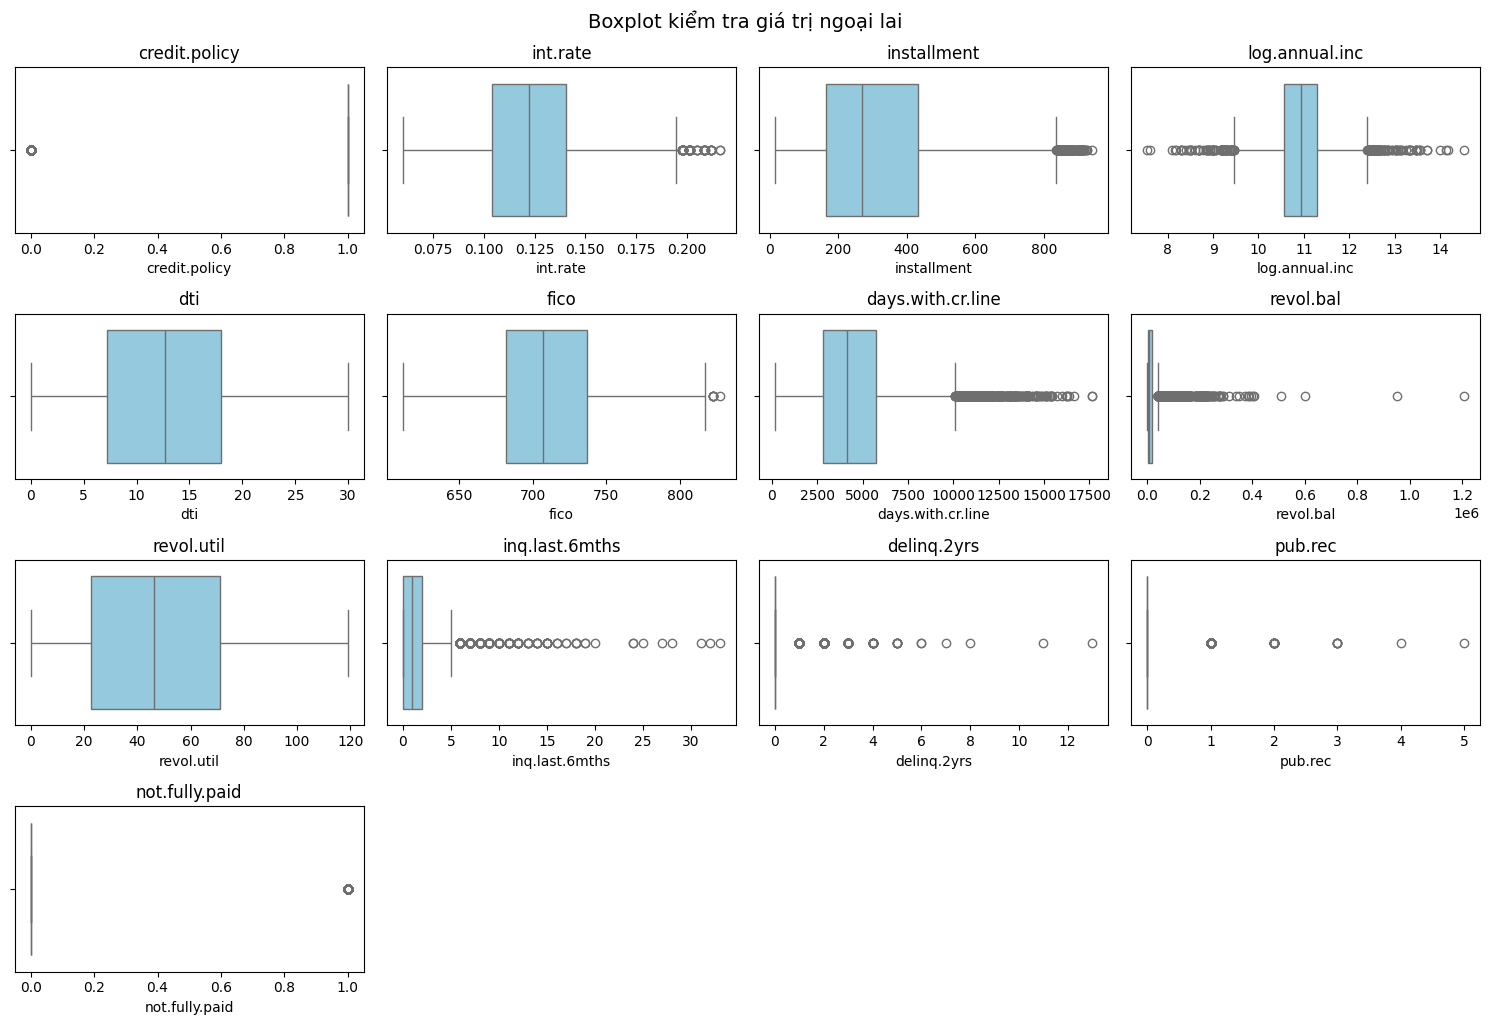

In [ ]:
#Kiểm tra sơ bộ bằng biểu đồ Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Lấy danh sách các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Tạo bố cục biểu đồ
plt.figure(figsize=(15, 10))
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)
# Dùng vòng lặp để vẽ biểu đồ
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot kiểm tra giá trị ngoại lai", fontsize=14, y=1.02)
plt.show()

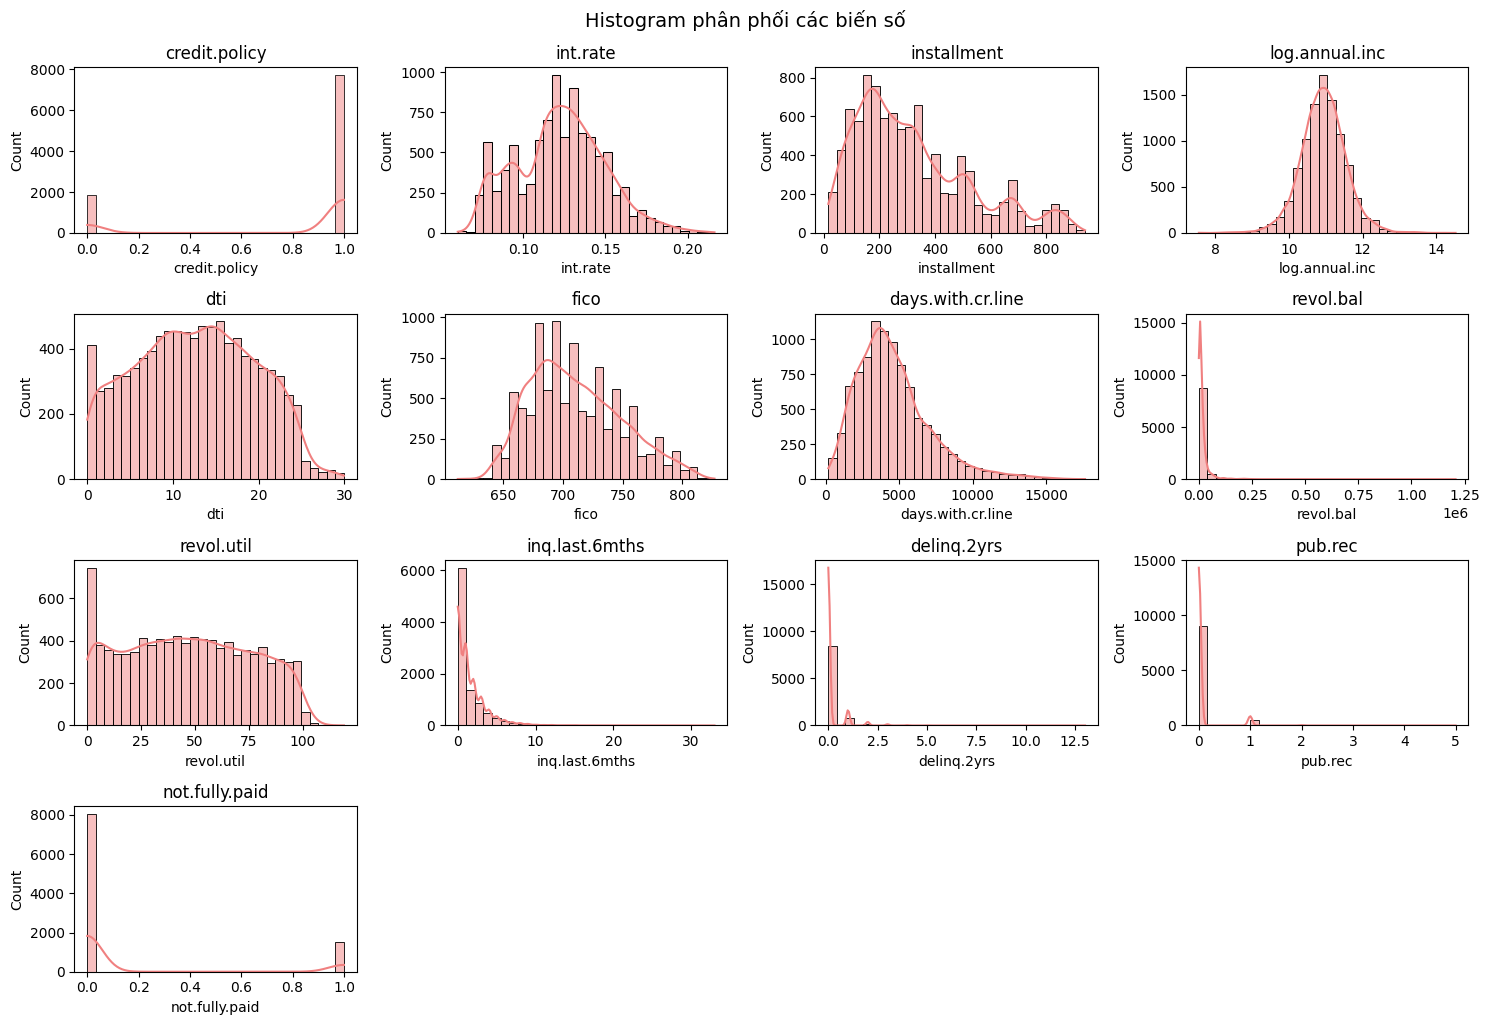

In [ ]:
#Kiểm tra sơ bộ bằng Histogram
# Lấy danh sách các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Xác định số hàng và cột hiển thị
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(15, 10))
# Lặp qua từng biến số để vẽ histogram
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='lightcoral')
    plt.title(col)
    plt.tight_layout()
# Tiêu đề chung
plt.suptitle("Histogram phân phối các biến số", fontsize=14, y=1.02)
plt.show()

Qua quan sát biểu đồ boxplot, ta nhận thấy nhiều biến như installment, int.rate, days.with.cr.line, inq.last.6mths, và revol.bal có xuất hiện nhiều điểm ngoại lai nằm xa khỏi hộp dữ liệu chính, cho thấy sự tồn tại của các giá trị bất thường trong tập dữ liệu. Bên cạnh đó, biểu đồ phân phối (histogram) cho thấy phần lớn các biến có phân phối lệch phải (right-skewed) hoặc không tuân theo phân phối chuẩn, điều này khiến cho các phương pháp truyền thống như IQR (Interquartile Range) hay Z-score kém hiệu quả, vì chúng giả định dữ liệu có phân phối chuẩn hoặc đối xứng.

Do đó, nhóm lựa chọn phương pháp hệ số ngoại lai cục bộ (Local Outlier Factor – LOF) để xử lý giá trị ngoại lai. Phương pháp này không dựa trên phân phối toàn cục của dữ liệu mà đánh giá mức độ “cô lập” của từng điểm dữ liệu so với mật độ lân cận cục bộ. Cách tiếp cận này giúp phát hiện các điểm bất thường trong những cụm có mật độ khác nhau, phù hợp với đặc điểm phân phối không đồng nhất của dữ liệu hiện tại. Đồng thời, LOF có khả năng xử lý các trường hợp ngoại lai phức tạp đa chiều, giúp duy trì cấu trúc dữ liệu và giảm thiểu mất mát thông tin so với việc loại bỏ giá trị bằng ngưỡng cứng (như IQR).

Từ đó, nhóm quyết định áp dụng LOF làm phương pháp tối ưu để phát hiện và loại bỏ các giá trị ngoại lai trước khi tiến hành huấn luyện mô hình.

In [24]:
from sklearn.neighbors import LocalOutlierFactor
df_clean = df.copy()

# 1.Định nghĩa các cột số liên tục để áp dụng LOF
# LOF chỉ áp dụng cho các cột số. Loại trừ 'purpose' (object) và các cột nhị phân/đếm rời rạc.
numerical_cols_for_lof = [
    'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
    'days.with.cr.line', 'revol.bal', 'revol.util'
]

# Trích xuất các cột cần áp dụng
X = df_clean[numerical_cols_for_lof]

# 2. Khởi tạo và Huấn luyện mô hình LOF
# contamination=0.05 giả định 5% dữ liệu là ngoại lai.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# fit_predict trả về mảng: -1 cho outliers (ngoại lai), 1 cho inliers
outlier_labels = lof.fit_predict(X)

# 3. Thêm nhãn vào DataFrame
df_clean['lof_label'] = outlier_labels

# 4. Xác định và xóa các hàng ngoại lai
outliers_count = len(df_clean[df_clean['lof_label'] == -1])
print(f"Tổng số hàng được LOF xác định là ngoại lai (chỉ dựa trên các cột số): {outliers_count}")

# Xóa các hàng ngoại lai (chỉ giữ lại những hàng có nhãn 1)
df_cleaned = df_clean[df_clean['lof_label'] == 1].drop(columns=['lof_label'])

# 5. Kiểm tra kích thước DataFrame sau khi làm sạch
print(f"Kích thước DataFrame gốc (df): {df.shape}")
print(f"Kích thước DataFrame sau khi loại bỏ ngoại lai:{df_cleaned.shape}")


Tổng số hàng được LOF xác định là ngoại lai (chỉ dựa trên các cột số): 958
Kích thước DataFrame gốc (df): (9578, 14)
Kích thước DataFrame sau khi loại bỏ ngoại lai:(8620, 14)


##### Nhận xét:
Quá trình làm sạch này đã loại bỏ thành công 858 điểm dữ liệu bất thường dựa trên mật độ cục bộ. Bộ dữ liệu (8620, 14) hiện đã sạch hơn và sẵn sàng cho các bước tiền xử lý quan trọng tiếp theo

### 2.2. Rút gọn dữ liệu
 Với bộ dữ liệu chứa 8620 quan sát, số lượng này đủ lớn để sử dụng trong quá xây dựng và đánh giá mô hình. Vậy nên nhóm quyết định không thực hiện bước rút gọn dữ liệu này.


### 2.3. Tích hợp dữ liệu
 Qua quá trình đánh giá, nhóm kết luận rằng bộ dữ liệu gồm 8620 quan sát, không tồn tại giá trị bị thiếu đã đáp ứng đủ các tiêu chí về chất lượng và số lượng để tiến hành phân tích. Việc bổ sung thêm dữ liệu vào thời điểm này có thể gây ra tình trạng nhiễu dữ liệu, ảnh hưởng đến độ tin cậy của kết quả nghiên cứu. Vì vậy, nhóm quyết định không tích hợp thêm dữ liệu.


### 2.4 Mã hóa dữ liệu

Trong bộ dữ liệu, nhóm nhận thấy biến purpose là biến phân loại (categorical), thể hiện mục đích vay vốn của khách hàng (như vay để mua nhà, vay tiêu dùng, vay học tập,…). Do các mô hình học máy chỉ có thể xử lý dữ liệu dạng số, nên việc mã hóa biến phân loại là bước cần thiết để chuyển đổi thông tin này sang dạng phù hợp cho quá trình huấn luyện mô hình.

Có nhiều phương pháp mã hóa dữ liệu như Label Encoding, One-Hot Encoding hay Target Encoding. Tuy nhiên, vì biến purpose không có quan hệ thứ tự giữa các giá trị (ví dụ “vay mua nhà” không hơn “vay học tập”), nên nhóm đã lựa chọn phương pháp One-Hot Encoding. Phương pháp này giúp tạo ra các biến giả (dummy variables) đại diện cho từng mục đích vay, đảm bảo rằng mô hình không hiểu sai các giá trị phân loại như các giá trị có tính thứ tự.

Việc áp dụng One-Hot Encoding cho biến purpose giúp mô hình hiểu rõ hơn về mối quan hệ giữa mục đích vay và khả năng hoàn trả, đồng thời giữ nguyên bản chất định tính của dữ liệu mà không gây sai lệch trong quá trình phân tích hay dự báo.

In [25]:
# 1. Thực hiện One-Hot Encoding cho cột 'purpose'
# drop_first=True loại bỏ một cột danh mục để tránh đa cộng tuyến.
purpose_dummies = pd.get_dummies(df_cleaned['purpose'], prefix='purpose', drop_first=True)

# 2. Gộp các cột mới đã mã hóa vào DataFrame và loại bỏ cột 'purpose' gốc
df_encoded = pd.concat([df_cleaned.drop('purpose', axis=1), purpose_dummies], axis=1)

# 3. Kiểm tra kích thước và 5 hàng đầu tiên
print(f"Kích thước DataFrame gốc (df_cleaned): {df_cleaned.shape}")
print(f"Kích thước DataFrame sau khi mã hóa: {df_encoded.shape}")
print("\n5 Hàng đầu tiên của DataFrame đã được mã hóa:")
df_encoded.head()

Kích thước DataFrame gốc (df_cleaned): (8620, 14)
Kích thước DataFrame sau khi mã hóa: (8620, 19)

5 Hàng đầu tiên của DataFrame đã được mã hóa:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,True,False,False,False,False,False
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,False,True,False,False,False,False


### 2.5. Chuẩn hóa dữ liệu

Trong quá trình tiền xử lý, nhóm tiến hành chuẩn hóa dữ liệu để đảm bảo các biến có quy mô (scale) tương đồng, tránh tình trạng những biến có giá trị lớn chi phối mô hình. Việc chuẩn hóa đặc biệt quan trọng trong các mô hình dựa trên khoảng cách hoặc có trọng số (như hồi quy logistic, SVM, KNN, hay mô hình phân lớp tuyến tính).

Cụ thể, nhóm lựa chọn chuẩn hóa các biến số liên tục, tức là những biến có thể nhận bất kỳ giá trị nào trong một khoảng và có phạm vi giá trị rộng. Các biến được chuẩn hóa gồm:

Lãi suất (int.rate)

Khoản trả góp (installment)

Thu nhập hằng năm (log.annual.inc)

Tỷ lệ nợ trên thu nhập (dti)

Điểm tín dụng (fico)

Số ngày có hạn mức tín dụng (days.with.cr.line)

Số dư quay vòng (revol.bal)

Tỷ lệ sử dụng quay vòng (revol.util)

Nhóm sử dụng phương pháp chuẩn hóa Z-score, giúp các biến có trung bình bằng 0 và độ lệch chuẩn bằng 1
(mean=0,std=1). Cách chuẩn hóa này giúp mô hình học máy đánh giá các biến một cách công bằng, không bị ảnh hưởng bởi độ lớn tuyệt đối của giá trị.

Đối với các biến không được chuẩn hóa, nhóm giữ nguyên giá trị gốc vì chúng mang ý nghĩa phân loại hoặc định lượng rời rạc:

Biến nhị phân (0/1): credit.policy, not.fully.paid — đã thể hiện trạng thái rõ ràng, việc chuẩn hóa có thể làm mất ý nghĩa logic của 0 và 1.

Biến đếm rời rạc: inq.last.6mths, delinq.2yrs, pub.rec — thể hiện số lần xảy ra của một sự kiện, nên không cần chuẩn hóa để tránh mất đi khả năng diễn giải.

Các biến mã hóa từ One-Hot Encoding: các cột purpose_... — là biến nhị phân đại diện cho từng mục đích vay vốn, việc chuẩn hóa sẽ làm sai lệch bản chất nhị phân này.

Như vậy, việc chỉ chuẩn hóa các biến liên tục và giữ nguyên các biến phân loại hoặc rời rạc giúp đảm bảo độ chính xác, tính diễn giải và hiệu quả huấn luyện mô hình.

In [27]:
# Import StandardScaler để chuẩn hóa dữ liệu số liên tục
from sklearn.preprocessing import StandardScaler
# 1. Định nghĩa các nhóm cột
# Các biến số liên tục CẦN CHUẨN HÓA (từ phân tích Histogram)
cols_to_scale = [
    'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
    'days.with.cr.line', 'revol.bal', 'revol.util'
]

# Tách riêng các cột cần chuẩn hóa
Y_to_scale = df_encoded[cols_to_scale]

# Các cột nhị phân/đếm RỜI RẠC/ĐÃ MÃ HÓA (GIỮ NGUYÊN)
# Bao gồm các biến 0/1, biến đếm và các cột 'purpose_' đã được mã hóa.
cols_to_keep = [col for col in df_encoded.columns if col not in cols_to_scale]
Y_non_scaled = df_encoded[cols_to_keep]

# 2. Tiến hành Chuẩn hóa (Standard Scaling)
scaler = StandardScaler()

# Huấn luyện và biến đổi chỉ trên các cột số liên tục
Y_scaled_array = scaler.fit_transform(Y_to_scale)

# Chuyển mảng kết quả về lại DataFrame
Y_scaled_df = pd.DataFrame(
    Y_scaled_array,
    columns=Y_to_scale.columns,
    index=Y_to_scale.index
)

# 3. Gộp các biến đã chuẩn hóa và các biến được giữ nguyên
# Kết hợp 2 DataFrame đã xử lý
df_final_scaled = pd.concat([Y_scaled_df, Y_non_scaled], axis=1)

# 4. Kiểm tra kết quả
print(f"Kích thước DataFrame cuối cùng: {df_final_scaled.shape}")
print("\n5 hàng đầu tiên (kiểm tra các cột số đã được chuẩn hóa):")
df_final_scaled.head()

Kích thước DataFrame cuối cùng: (8620, 19)

5 hàng đầu tiên (kiểm tra các cột số đã được chuẩn hóa):


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.100786,2.794709,0.731371,0.984714,0.703953,0.515288,0.555506,0.168593,1,0,0,0,0,False,True,False,False,False,False
2,0.531035,0.363075,-0.879439,-0.161799,-0.764280,0.099773,-0.500370,-0.750382,1,1,0,0,0,False,True,False,False,False,False
4,0.790533,-1.025392,0.647816,0.326016,-1.164708,-0.187973,-0.449166,-0.268353,1,0,1,0,0,True,False,False,False,False,False
5,-1.608884,-0.908556,1.645772,0.619582,0.437001,0.729795,1.470143,0.130447,1,0,0,0,0,True,False,False,False,False,False
6,1.053792,-0.546157,-0.317294,-1.276181,-1.164708,-0.583829,-0.486705,1.025147,1,0,0,1,1,False,True,False,False,False,False


In [34]:
# Xuất file CSV
file_name_cleaned = 'loan_data_cleaned_only.csv'
df_cleaned.to_csv(file_name_cleaned, index=False)

file_name_scaled = 'loan_data_final_scaled.csv'
df_final_scaled.to_csv(file_name_scaled, index=False)
files.download('loan_data_cleaned_only.csv')
files.download('loan_data_final_scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>